In [305]:
# data processing, CSV file I/O (e.g. pd.read_csv)
#reference: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
import pandas as pd
import matplotlib.pyplot as np
import matplotlib
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Analysing training Dataset

In [306]:
#load the train dataset
train_data = pd.read_csv("../input/train.csv")

train_data.head()


,Id,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,15817,-120.85,37.57,27,819,157,451,150,34934,193800
1,6236,-117.74,34.06,48,2438,599,1508,548,28983,129200
2,19262,-118.11,33.92,32,1016,190,729,177,43000,151300
3,19743,-118.12,34.15,35,1760,447,984,384,34167,198200
4,7272,-120.63,37.41,27,2083,444,1462,479,26439,69100


## Median value according to age

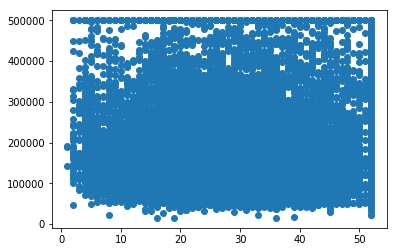

In [307]:
median_value = train_data['median_house_value']
median_age = train_data['median_age']

fig, ax= np.subplots()
ax.scatter(median_age, median_value)

## Median value accordingly to total rooms

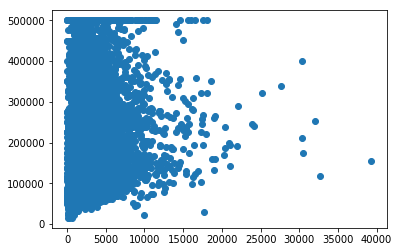

In [308]:
total_rooms = train_data['total_rooms']

fig, ax= np.subplots()
ax.scatter(total_rooms, median_value)

## Median value accordingly to total bedrooms

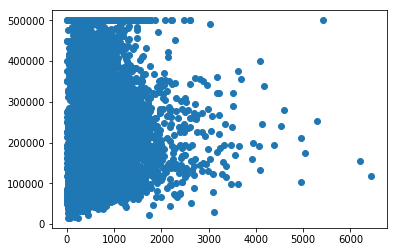

In [309]:
total_bedrooms = train_data['total_bedrooms']

fig, ax= np.subplots()
ax.scatter(total_bedrooms, median_value)


## Median value accordingly to population 

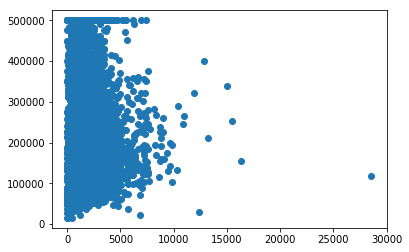

In [310]:
population = train_data['population']

fig, ax= np.subplots()
ax.scatter(population, median_value)

## Median value accordingly to households


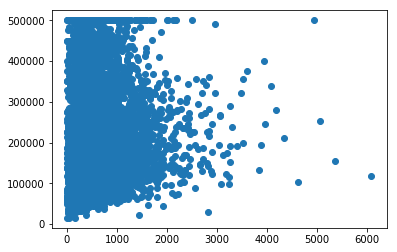

In [311]:
households = train_data['households']

fig, ax= np.subplots()
ax.scatter(households, median_value)


## Median value accordingly to income

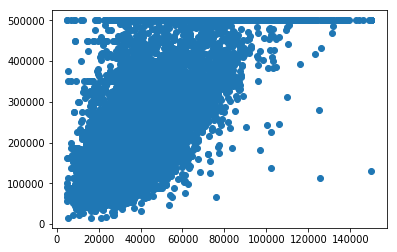

In [312]:
median_income = train_data['median_income']

fig, ax= np.subplots()
ax.scatter(median_income, median_value)

# **Building Linear Regression Model**

In [313]:
#Import test data
test_data = pd.read_csv("../input/test.csv")

test_data = test_data.dropna()

train_dataY = train_data['median_house_value']
train_dataX = train_data.drop(columns = ['median_house_value'])

regr = linear_model.LinearRegression()
regr.fit(train_dataX, train_dataY)

#print found coefficients
print('Coefficients: \n', regr.coef_)



Coefficients: 
 [ 2.16877191e-02 -4.25024012e+04 -4.25520961e+04  1.17118443e+03
 -7.42845888e+00  1.06845952e+02 -4.42580998e+01  6.65420445e+01
  4.01725944e+00]


## Load test data and compare

In [314]:
#Predict using coefficients
predict = regr.predict(test_data)

predict_df = pd.DataFrame(predict)

predict_df.head()

predict_df['Id'] = test_data['Id']

predict_df




,0,Id
0,335392.918078,8609
1,171446.833062,14610
2,130532.111515,1557
3,121471.963184,12875
4,131583.234808,17821
5,232435.355256,1701
6,224779.270111,9856
7,165931.415270,9875
8,168350.861615,4924
9,143721.019355,13021


# Ridge Regression

In [315]:
reg = linear_model.Ridge (alpha = .5)
reg.fit(train_dataX, train_dataY)
reg.coef_

array([ 2.16958495e-02, -4.24964459e+04, -4.25464822e+04,  1.17128460e+03,
       -7.42984725e+00,  1.06843346e+02, -4.42578185e+01,  6.65529026e+01,
        4.01735696e+00])

In [316]:
reg.intercept_ 

-3555432.58020572

In [319]:
reg.predict(test_data)

array([335392.706397  , 171446.9451577 , 130532.20219443, ...,
       195945.64275141, 174924.08851854,  94634.6705328 ])

## Lasso

In [320]:
reg = linear_model.Lasso(alpha = 0.1)
reg.fit(train_dataX, train_dataY)
reg.predict(test_data)

array([335392.706397  , 171446.9451577 , 130532.20219443, ...,
       195945.64275141, 174924.08851854,  94634.6705328 ])